## Load Dependencies

In [1]:
import matplotlib.pyplot as plt # for plotting
from tmaze_toolkit.data.extraction import selectDoorCoords, extractDoorTraces, initial_coords
from tmaze_toolkit.processing.signal import bandpass_filter, process_door_traces
from tmaze_toolkit.visualization.plotDoorTraces import plotDoorTraces
from tmaze_toolkit.data.openFunctions import openDoorTracesPkl
from tmaze_toolkit.processing.extractTrialTimes import extract_floor_traces, extract_trial_times, verify_correct_trial_times
from tmaze_toolkit.data.jsonProcessing import load_json_files, add_trajectories, save_outDict
from tmaze_toolkit.visualization.plotTrajectory import plot_trajectory, plot_trajectory_all_trials, plot_multiple_bodyparts
from tmaze_toolkit.processing.normalize import normalize_trajectory
from tmaze_toolkit.data.analysisTools import find_percent_correct, find_trial_length, save_trial_duration, load_trial_duration

In [2]:
pkl_file = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-22T18_28_44_doorTraces.pkl"
dat = openDoorTracesPkl(pkl_file)
dat = process_door_traces(dat)
events = extract_trial_times(dat, use_floor_traces=False,pad_frames=120)

Floor Starts: 95
Floor Ends: 95
Trial Starts: 90
Trial Ends: 90
Trial 0 likely has a missed detection in the doors 1 and 2
Trial 1 likely has a missed detection in the doors 1 and 2
Trial 2 likely has a missed detection in the doors 1 and 2
Trial 3 likely has a missed detection in the doors 1 and 2
Trial 4 likely has a missed detection in the doors 1 and 2
Trial 5 likely has a missed detection in the doors 1 and 2
Trial 6 likely has a missed detection in the doors 1 and 2
Trial 7 likely has a missed detection in the doors 1 and 2
Trial 8 likely has a missed detection in the doors 1 and 2
Trial 9 likely has a missed detection in the doors 1 and 2
Trial 10 likely has a missed detection in the doors 1 and 2
Trial 11 likely has a missed detection in the doors 1 and 2
Trial 12 likely has a missed detection in the doors 1 and 2
Trial 13 likely has a missed detection in the doors 1 and 2
Trial 14 likely has a missed detection in the doors 1 and 2
Trial 15 likely has a missed detection in the 

In [3]:
print(len(events))

90


In [4]:
jsonFileLocation = r"N:\TMAZE\TMAZE_DATA\data_ATO1_20250322*"
outDict = load_json_files(jsonFileLocation)
print(len(outDict))
verify_correct_trial_times(events, jsonFileLocation)

Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_182807.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_190937.json
91
Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_182807.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_190937.json
Trial times verified successfully


True

In [5]:
print(len(outDict))

91


In [6]:
outDict[1]

{'MazeTexture': 'CNO',
 'rewardBefLick': False,
 'lickUntilCorrect': False,
 'decision': 'incorrect',
 'floorID': 'F,1',
 'time_for_trial': 6,
 'valve': 1,
 'lick': 'right(V2)',
 'trial_number': 2,
 'trial_time': [2025, 3, 22, 18, 28, 57, 5, 81, 1],
 'right_probability': 0.5,
 'rewardAmount(ms)': 5,
 'BiasCorrection(T/F)': False,
 'coneHeight_1(floor1)': '0.5',
 'coneHeight_2(floor2)': '1',
 'Injection': '1'}

In [7]:
import pandas as pd
def find_trial_length(events):
    trial_lengths = []
    trial_numbers = []
    n = 1
    for i in range(len(events)):
        trial_numbers.append(n)
        trial_lengths.append(events.iloc[i]['trial_end_frame'] - events.iloc[i]['trial_start_frame'])
        n += 1

    trial_duration = pd.DataFrame({'trial_number': trial_numbers, 'trial_duration': trial_lengths})
    return trial_duration


In [8]:

trial_duration = find_trial_length(events)
print(trial_duration)

    trial_number  trial_duration
0              1           861.0
1              2           335.0
2              3           220.0
3              4           177.0
4              5           247.0
..           ...             ...
85            86            65.0
86            87           293.0
87            88            69.0
88            89           306.0
89            90          1265.0

[90 rows x 2 columns]


In [9]:
def average_trial(trial_duration):
    counter = 0
    num = len(trial_duration)
    for x in range(num):
        counter += trial_duration.iloc[x]['trial_duration']

    return counter/num

In [10]:
print(f"Average_Duration: {average_trial(trial_duration)}")

Average_Duration: 304.55555555555554


In [11]:
outDict = load_json_files(jsonFileLocation)
outDict[67]['lick']
print(len(events))


Found 2 json files
Animal ID: ATO1
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_182807.json
Working on file N:\TMAZE\TMAZE_DATA\data_ATO1_20250322_190937.json
90


In [12]:
from tmaze_toolkit.data.deeplabcutProcessing import load_deeplabcut_files
dlc_file = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-22T18_28_44DLC_resnet50_Intermidiate textured DLC model Sep10shuffle1_100000.h5"
dlc_dict = load_deeplabcut_files(dlc_file)

In [13]:
outDict = add_trajectories(outDict, dlc_dict, events)


In [14]:
print(outDict[3]['lick'])
print(outDict[3])


right(V2)
{'MazeTexture': 'CNO', 'rewardBefLick': False, 'lickUntilCorrect': False, 'decision': 'correct', 'floorID': 'F,4', 'time_for_trial': 2, 'valve': 4, 'lick': 'right(V2)', 'trial_number': 4, 'trial_time': [2025, 3, 22, 18, 30, 3, 5, 81, 1], 'right_probability': 0.5, 'rewardAmount(ms)': 5, 'BiasCorrection(T/F)': False, 'coneHeight_1(floor1)': '0.5', 'coneHeight_2(floor2)': '1', 'Injection': '1', 'trajectory': scorer    DLC_resnet50_Intermidiate textured DLC model Sep10shuffle1_100000  \
bodyparts                                                          RightEye   
coords                                                                    x   
3172                                               16.601727                  
3173                                               16.427338                  
3174                                               16.200077                  
3175                                               15.978073                  
3176                        

In [15]:
percent_correct = find_percent_correct(outDict)
print(percent_correct)


0.5934065934065934


In [16]:
save_outDict(outDict, jsonFileLocation)

In [17]:
videoFile = r"N:\TMAZE\TMAZE_REFIND_VID_NEW\Cropped_ATO1_Vidoes\ATO1_2025-03-22T18_28_44.mp4"

In [19]:
from tmaze_toolkit.visualization.plotTrajectory import plot_normalized_trajectory
plot_normalized_trajectory(outDict, videoFile, confidence_threshold=0.1)


KeyboardInterrupt: 

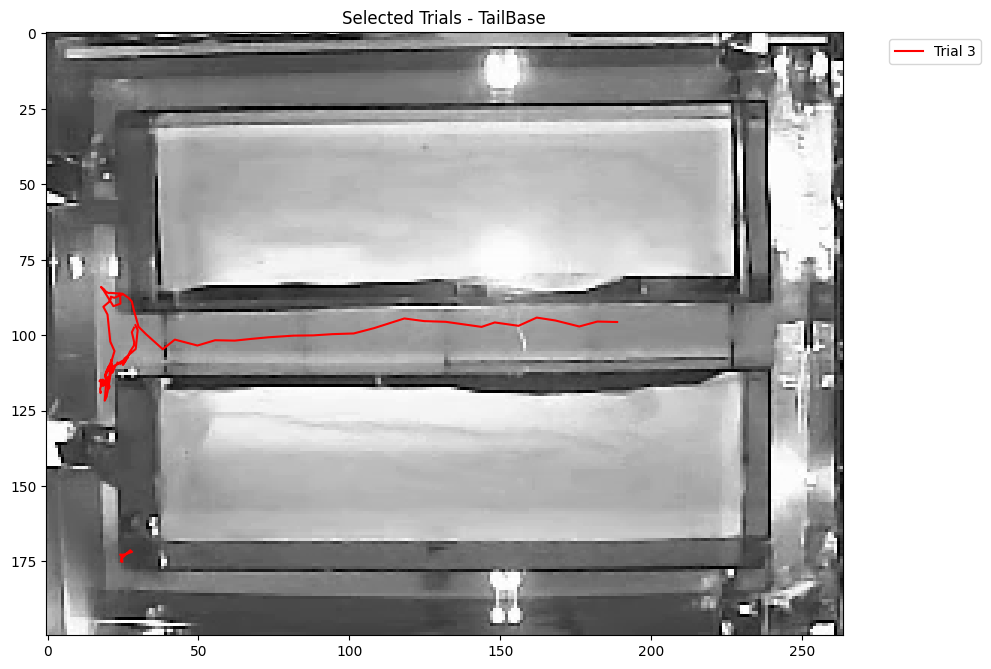

: 

In [ ]:
from tmaze_toolkit.visualization.plotTrajectory import plot_select_trial_trajectories
plot_select_trial_trajectories(outDict, videoFile, bodyPart='TailBase', confidence_threshold=0.4, trial_numbers=[1, 13, 2])

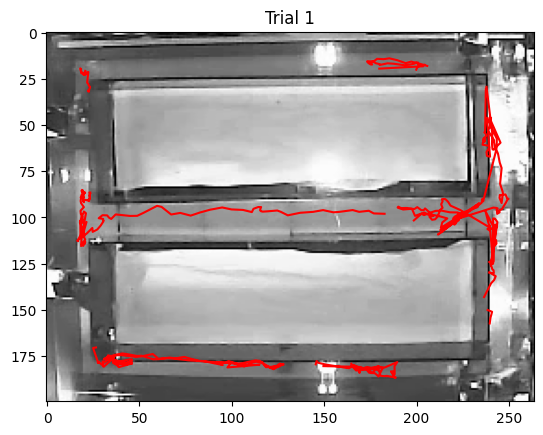

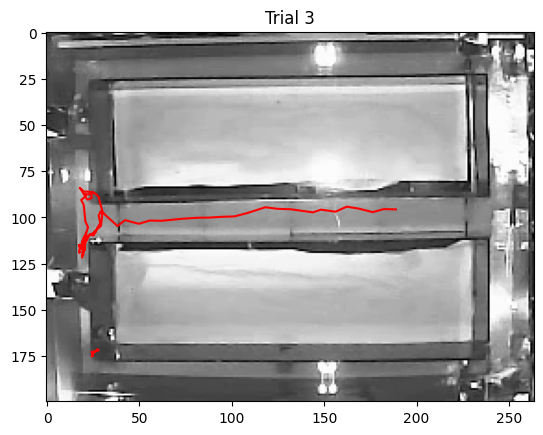

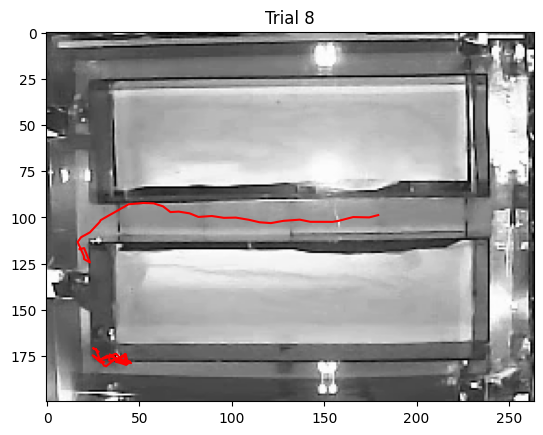

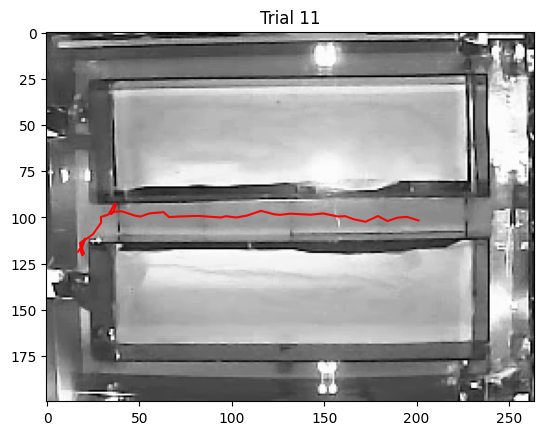

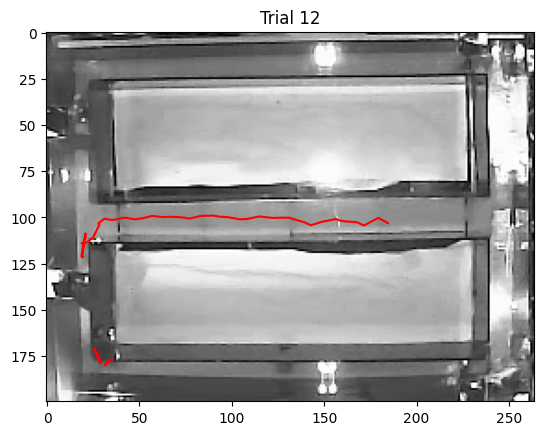

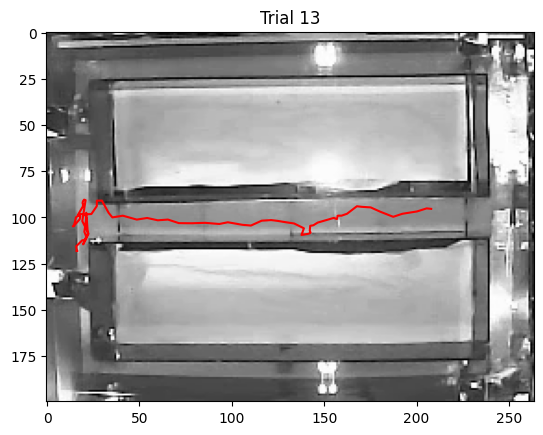

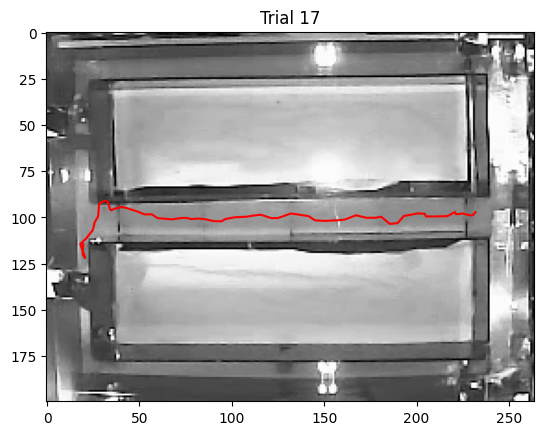

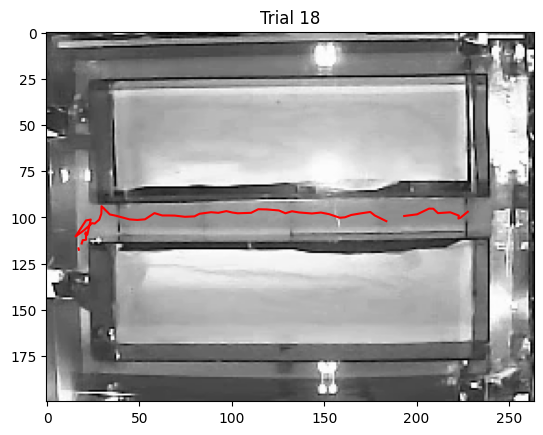

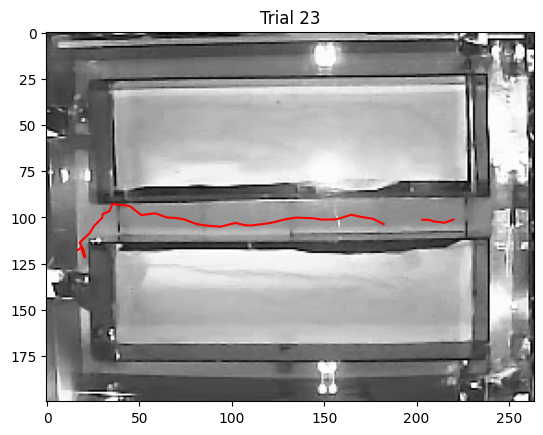

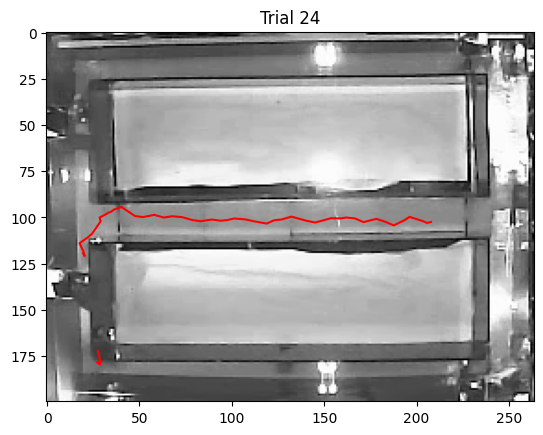

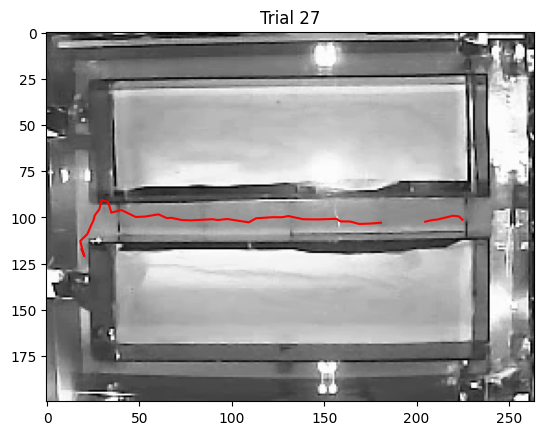

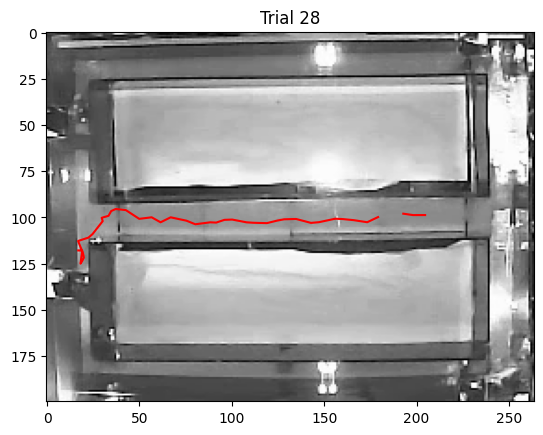

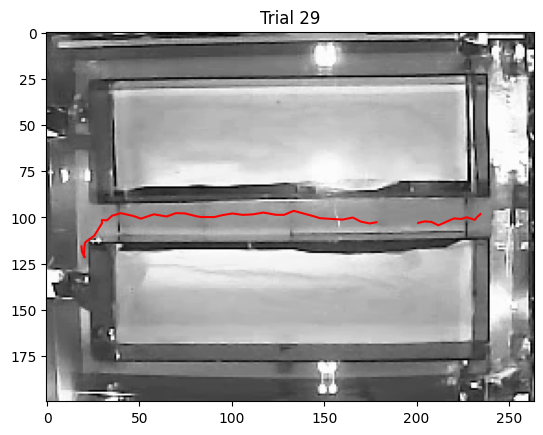

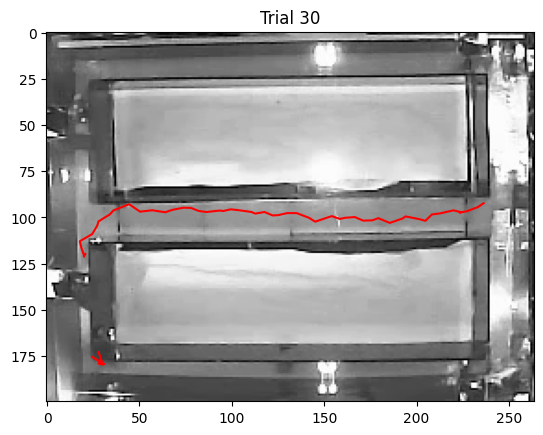

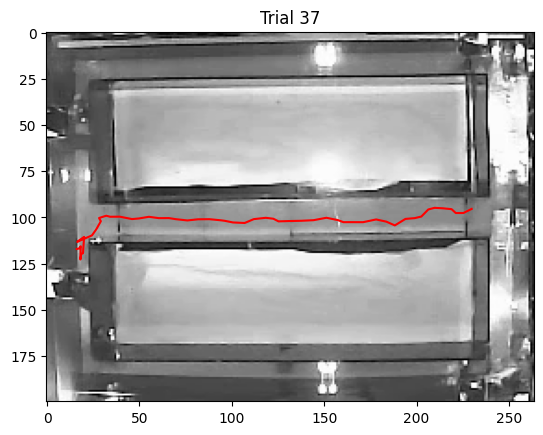

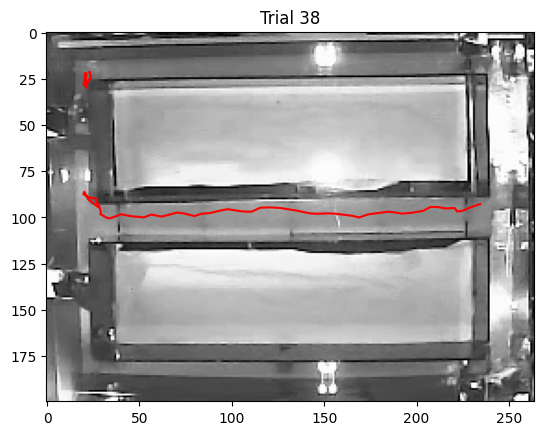

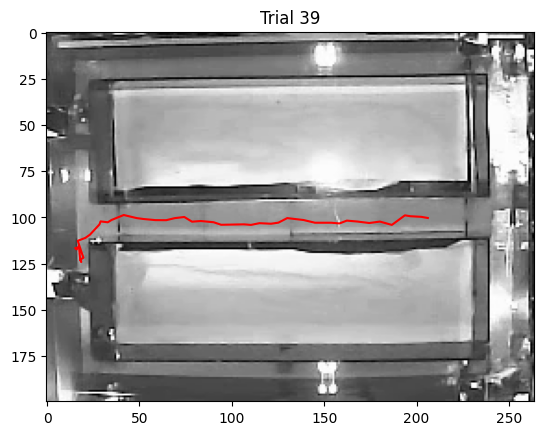

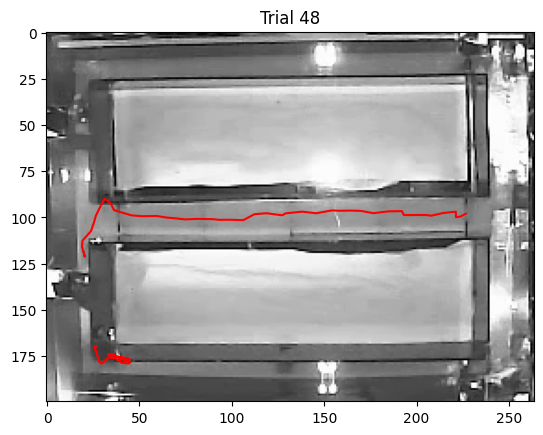

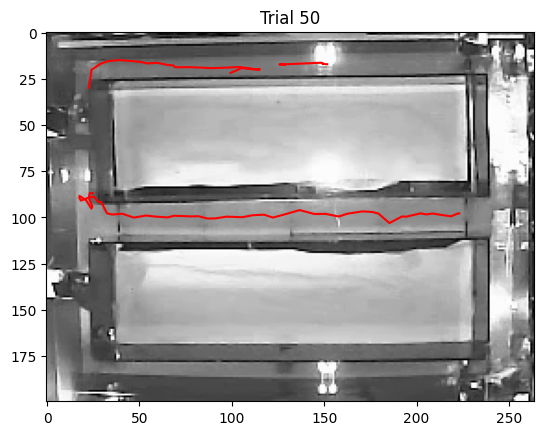

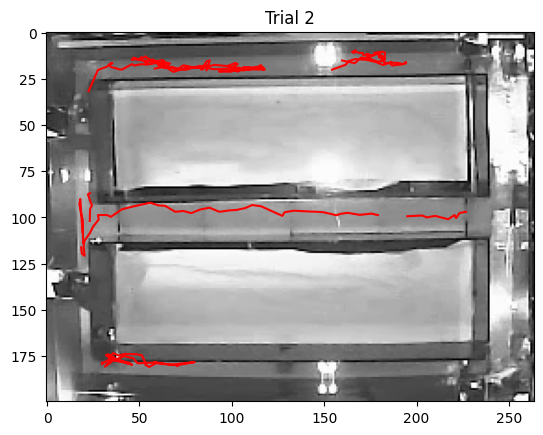

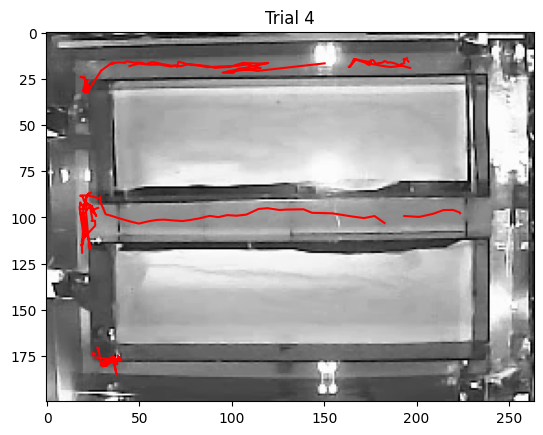

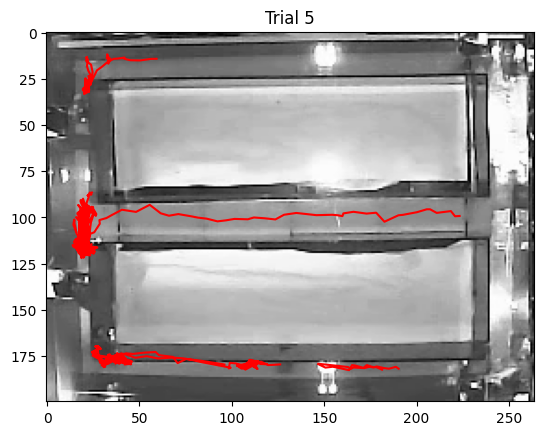

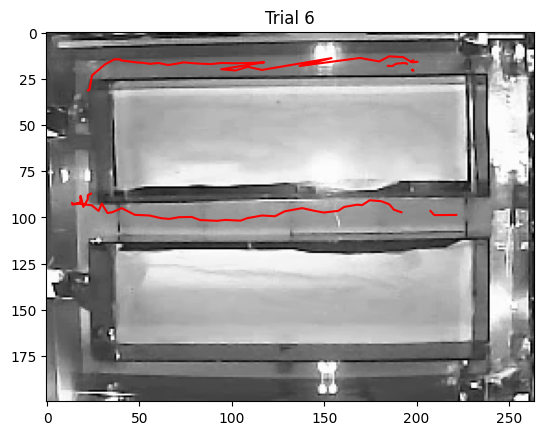

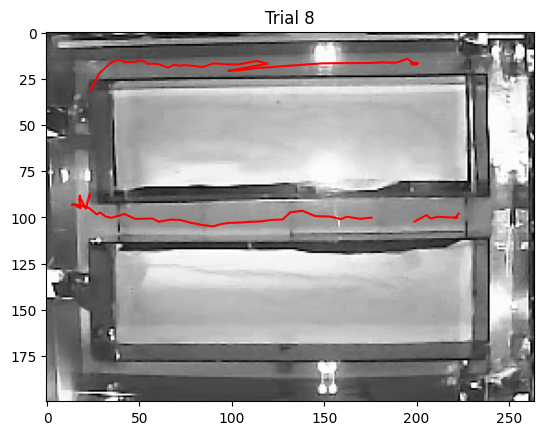

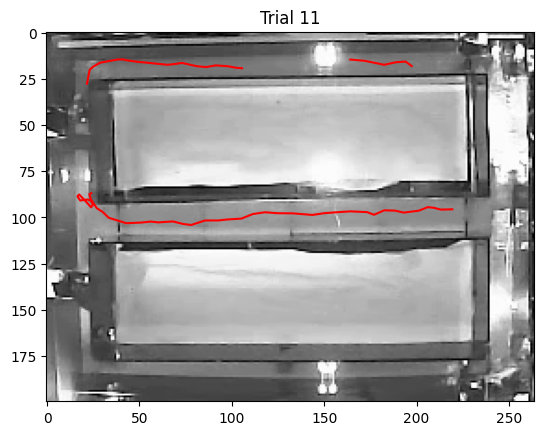

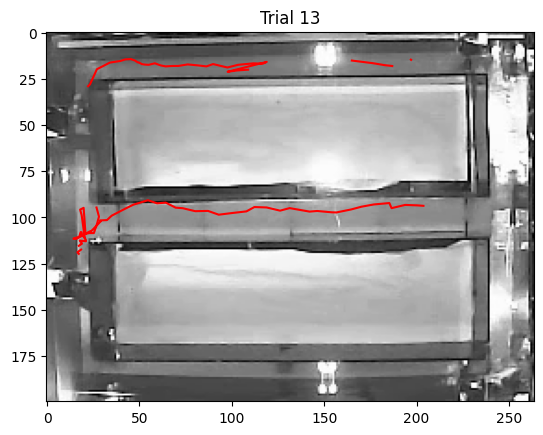

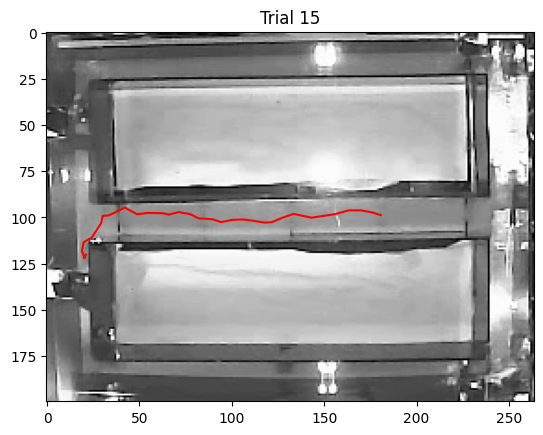

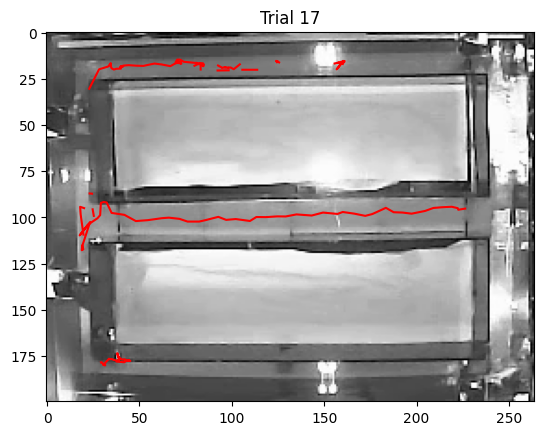

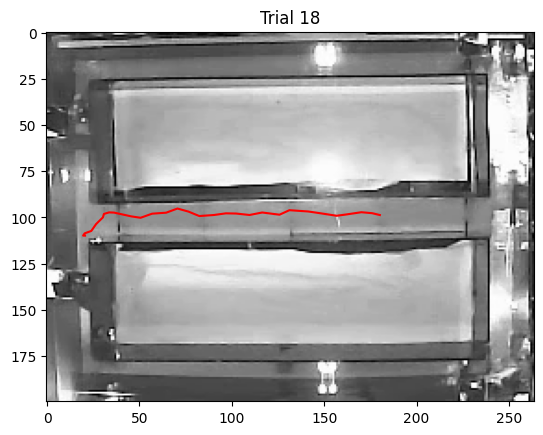

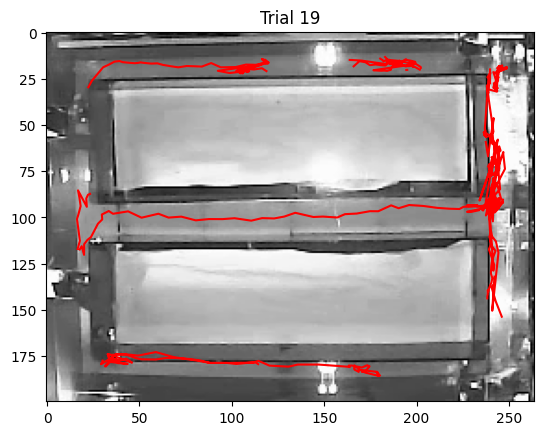

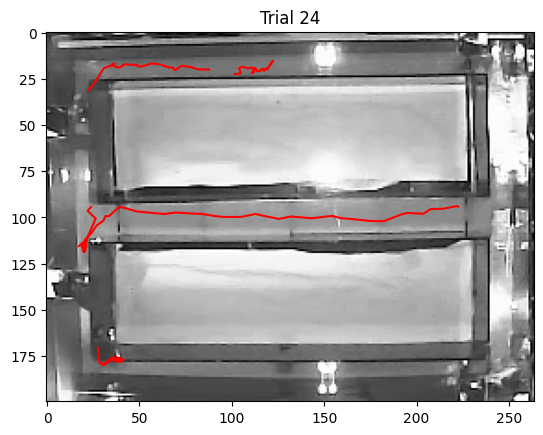

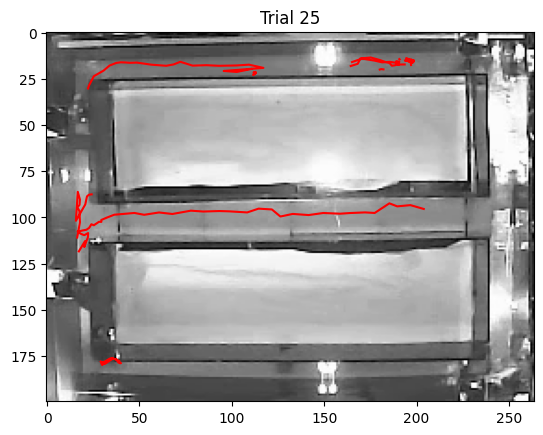

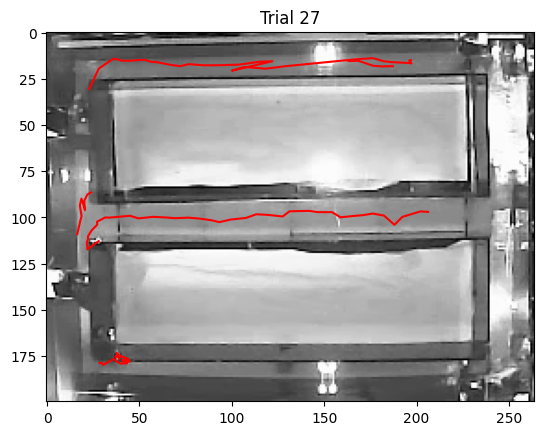

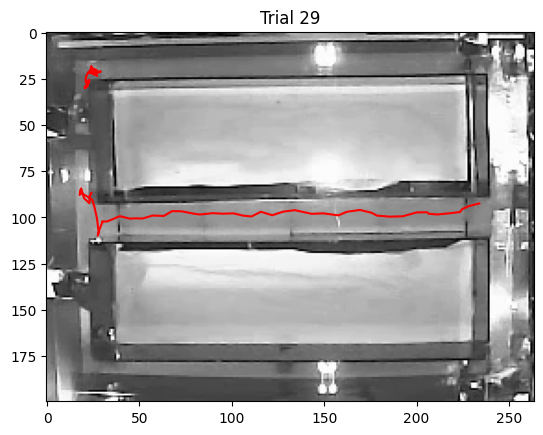

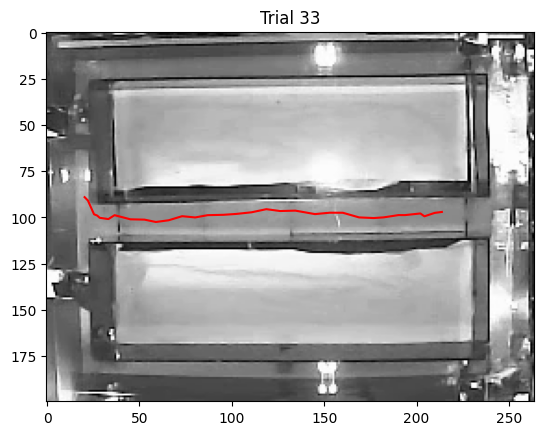

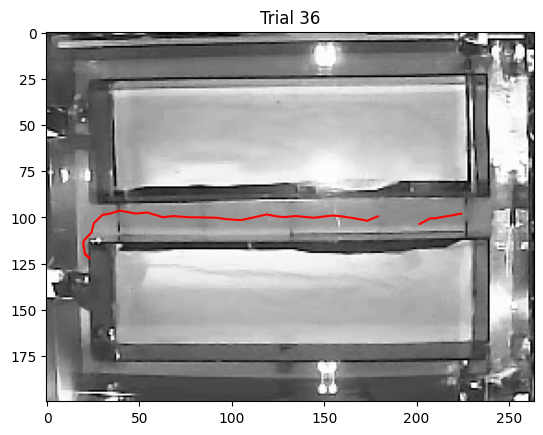

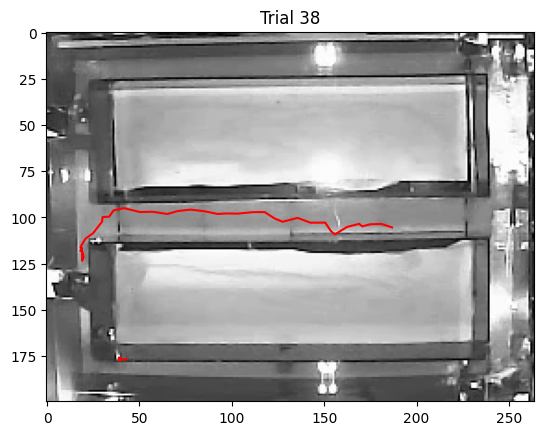

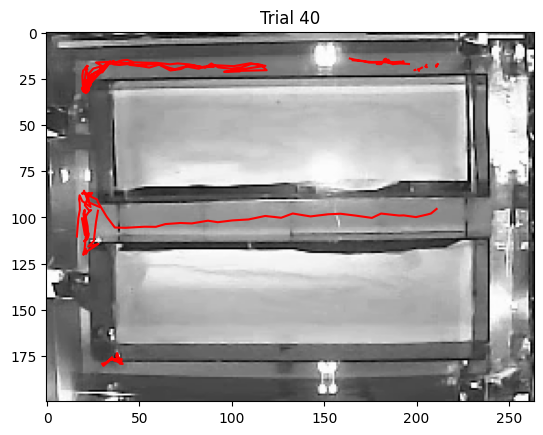

In [ ]:
plot_trajectory(outDict, videoFile, bodyPart='TailBase', confidence_threshold=0.4, color='r')